<a href="https://colab.research.google.com/github/roseleen-kaur/DataAnalytics_2022_Summer/blob/main/PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 2**#
Roseleen Kaur, Hema Muni

![picture](https://drive.google.com/uc?id=1u8a3PAjNVi2pTGuqYthMuJz7iRA2SnkB)

#**Data Summary**#

###Attributes###
![image.png](https://drive.google.com/uc?id=1qLEEisKyOlImmUZg6MsCJoCXaju9nFz_)
##Cholesterol:##

A [waxy](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/cholesterol), fat-like substance made in the liver, and found in the blood and in all cells of the body. Cholesterol is important for good health and is needed for making cell walls, tissues, hormones, vitamin D, and bile acid.

Having poor blood sugar control can make cholesterol levels worse.

##Glucose:##

[Blood](https://medlineplus.gov/bloodsugar.html#:~:text=Blood%20sugar%2C%20or%20glucose%2C%20is,sugar%20levels%20are%20too%20high.) sugar, or glucose, is the main sugar found in your blood.
Diabetes is a disease in which your blood sugar levels are too high.

##HDL (good cholesterol)##

[HDL](https://www.cdc.gov/cholesterol/ldl_hdl.htm#:~:text=HDL%20(high%2Ddensity%20lipoprotein),for%20heart%20disease%20and%20stroke.) (high-density lipoprotein), or “good” cholesterol, absorbs cholesterol and carries it back to the liver.
[Low](https://diabetesjournals.org/diabetes/article/64/9/3328/34865/HDL-Cholesterol-and-Risk-of-Type-2-Diabetes-A#:~:text=Introduction-,Low%20levels%20of%20HDL%20cholesterol%20are%20consistently%20associated%20with%20increased,diabetes%20(3%E2%80%935).) levels of HDL cholesterol are consistently associated with increased risk of type 2 diabetes.

##----------##

Age, Height, and Gender: these things don't really effect your chances of having diabestes too much. 

Of course, people of older age, male have higher chances of getting diabetes.   The [new](https://www.healthline.com/health-news/do-shorter-people-have-a-higher-risk-of-type-2-diabetes#:~:text=Researchers%20say%20height%20may%20be,lower%20their%20risk%20of%20diabetes.) study concludes that shorter people are at higher risk. Researchers add that the taller a person is, the lower their risk of diabetes.

##BMI##
[Surveys](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1890993/) showed that an increase in BMI is generally associated with a significant increase in prevalence of diabetes mellitus.

##Weight##
[Being](https://www.diabetes.org/healthy-living/weight-loss/extra-weight-extra-risk) overweight raises your risk for type 2 diabetes, heart disease, and stroke. It can also increase the risk of high blood pressure, unhealthy cholesterol, and high blood glucose (sugar). If you are overweight, losing weight may help you prevent and manage these conditions.

##Systolic BP and Diastolic BP##
So it seems that diabetes effects blood pressure.

When looking at someone's blood pressure, there are two measurements. The systolic is the top number and the diatolic is the bottom number.

[“Over](https://www.canopyhealth.com/understanding-the-relationship-between-high-blood-pressure-and-type-2-diabetes/) time, diabetes damages the small blood vessels in your body, causing the walls of the blood vessels to stiffen. This increases pressure, which leads to high blood pressure.” The combination of high blood pressure and type 2 diabetes can greatly increase your risk of having a heart attack or stroke.

[Diabetes](https://www.webmd.com/diabetes/high-blood-pressure#:~:text=Diabetes%20damages%20arteries%20and%20makes,heart%20attack%2C%20and%20kidney%20failure.) damages arteries and makes them targets for hardening, called atherosclerosis. That can cause high blood pressure, which if not treated, can lead to trouble including blood vessel damage, heart attack, and kidney failure.


##Waist, Hip and Waist Hip Ratio##

[Researchers](https://www.diabetes.org.uk/about_us/news_landing_page/waist-size-linked-to-type-2-diabetes-risk--regardless-of-bmi) have demonstrated a strong link between having a large waist circumference and an increased risk of developing Type 2 diabetes, independent of a person's body mass index (BMI).

##Response Variable##
Diabetes is our target, or response, variable. It has the final outcome for if someone has diabetes or not. 

The data in this data is mostly numerical continuous data, except for gender and diabetes. Those two are categorical nominal variables. 



#Question#
Does higher glucose and cholesterol mean more chances of having diabetes?
According to what I have searched in my domain research, this should be true. 

##**EDA**##


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report,roc_auc_score, r2_score
from scipy.stats import zscore
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_excel('https://query.data.world/s/pevls2w6fz6xqmma52fnylwxllfbci')
df = df.iloc[: , 1:16]
df.index = df.index + 1
df.rename(columns = {'HDL Chol':'HDL_Chol', 'Chol/HDL ratio':'Chol_HDL_ratio', 'Systolic BP':'Systolic_BP', 
                     'Diastolic BP': 'Diastolic_BP', 'Waist/hip ratio': 'Waist_hip_ratio'}, inplace = True)
df

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio,Diabetes
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,227,105,44,5.2,83,female,59,125,25.2,150,90,35,40,0.88,No diabetes
387,226,279,52,4.3,84,female,60,192,37.5,144,88,41,48,0.85,Diabetes
388,301,90,118,2.6,89,female,61,115,21.7,218,90,31,41,0.76,No diabetes
389,232,184,114,2.0,91,female,61,127,24.0,170,82,35,38,0.92,Diabetes


###Describe###

In [ ]:
df.describe()

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


###Info###

In [ ]:
#getting info on each variable
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])

df_info['NUnique'] = df.nunique()
df_info['Missing Vals'] = df.isnull().sum()
df_info['Count'] = df.count()
df_info['Zeros'] = (df==0).sum()
df_info['?'] = (df=='?').sum()


df_info

,Dtype,NUnique,Missing Vals,Count,Zeros,?
Cholesterol,int64,153,0,390,0,0
Glucose,int64,116,0,390,0,0
HDL_Chol,int64,75,0,390,0,0
Chol_HDL_ratio,float64,69,0,390,0,0
Age,int64,68,0,390,0,0
Gender,object,2,0,390,0,0
Height,int64,22,0,390,0,0
Weight,int64,139,0,390,0,0
BMI,float64,193,0,390,0,0
Systolic_BP,int64,71,0,390,0,0


As you can see there are no 0's, missing data, or even question marks. It is a very complete data set.

###Checking Duplicates###

In [ ]:
print(df[df.duplicated()])
#nice there are no duplicates.

Empty DataFrame
Columns: [Cholesterol, Glucose, HDL_Chol, Chol_HDL_ratio, Age, Gender, Height, Weight, BMI, Systolic_BP, Diastolic_BP, waist, hip, Waist_hip_ratio, Diabetes]
Index: []


There are no duplicates in this data set either. 

Here we set the values in the df column Diabetes, where 'No Diabetes' == 1 
and 'Diabetes' ==0

###One Hot Encoder for Response Variable###
Diabetes

In [ ]:
num_features = []
cat_features = []
for i in df.columns:
  if df[i].dtype != 'object':
    num_features.append(i)
  else: 
    cat_features.append(i)
print(f'Numerical Features:\n {num_features}')
print(f'Categorical Features:\n {cat_features}')



Numerical Features:
 ['Cholesterol', 'Glucose', 'HDL_Chol', 'Chol_HDL_ratio', 'Age', 'Height', 'Weight', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'waist', 'hip', 'Waist_hip_ratio']
Categorical Features:
 ['Gender', 'Diabetes']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Diabetes']= label_encoder.fit_transform(df['Diabetes']) 
#df['Diabetes'] = pd.Series(map(lambda x: dict(No diabetes=0, diabetes=1)[x], df.Diabetes.values.tolist()), df.index)
df

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio,Diabetes
1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,1
2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,1
3,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,1
4,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,1
5,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88,1
387,226,279,52,4.3,84,0,60,192,37.5,144,88,41,48,0.85,0
388,301,90,118,2.6,89,0,61,115,21.7,218,90,31,41,0.76,1
389,232,184,114,2.0,91,0,61,127,24.0,170,82,35,38,0.92,0


In [ ]:
num_features = []
cat_features = []
for i in df.columns:
  if df[i].dtype != 'object':
    num_features.append(i)
  else: 
    cat_features.append(i)
print(f'Numerical Features:\n {num_features}')
print(f'Categorical Features:\n {cat_features}')

Numerical Features:
 ['Cholesterol', 'Glucose', 'HDL_Chol', 'Chol_HDL_ratio', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'waist', 'hip', 'Waist_hip_ratio', 'Diabetes']
Categorical Features:
 []


In [ ]:
df.dtypes

Cholesterol          int64
Glucose              int64
HDL_Chol             int64
Chol_HDL_ratio     float64
Age                  int64
Gender               int64
Height               int64
Weight               int64
BMI                float64
Systolic_BP          int64
Diastolic_BP         int64
waist                int64
hip                  int64
Waist_hip_ratio    float64
Diabetes             int64
dtype: object

In [ ]:
df.describe()

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio,Diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,0.415385,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.846154
std,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,1.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,0.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,1.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,1.000000
max,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


All of our values are now numerical values. 

###Corr Matrix for Data###

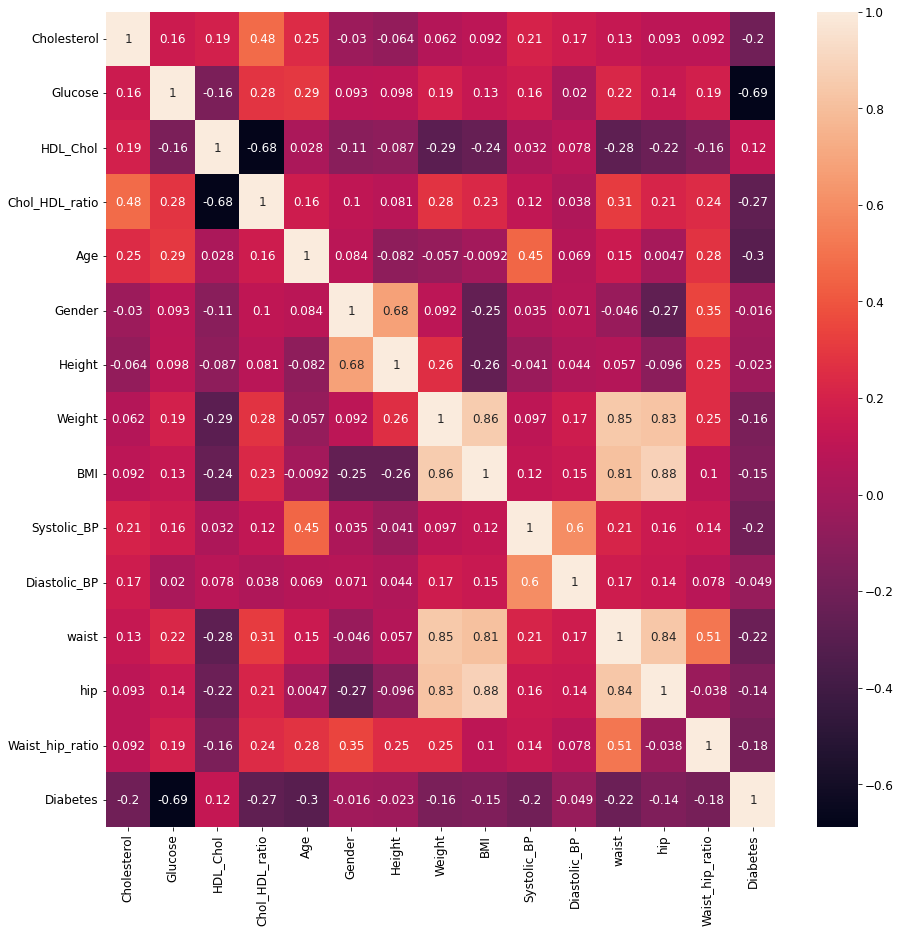

In [ ]:
corrMatrix = df.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() 

A lot of the features above are highly correlated with each other. 

Waist, Hip to BMI

Waist, Hip to Weight

Weight to BMI

Height to Gender

These features are correlated to each other the most. 

Then we also have things like: 

Age to Systolic BP

Cholesterol to Chol_HDL_Ratio

###Graphs for Numerical Data###

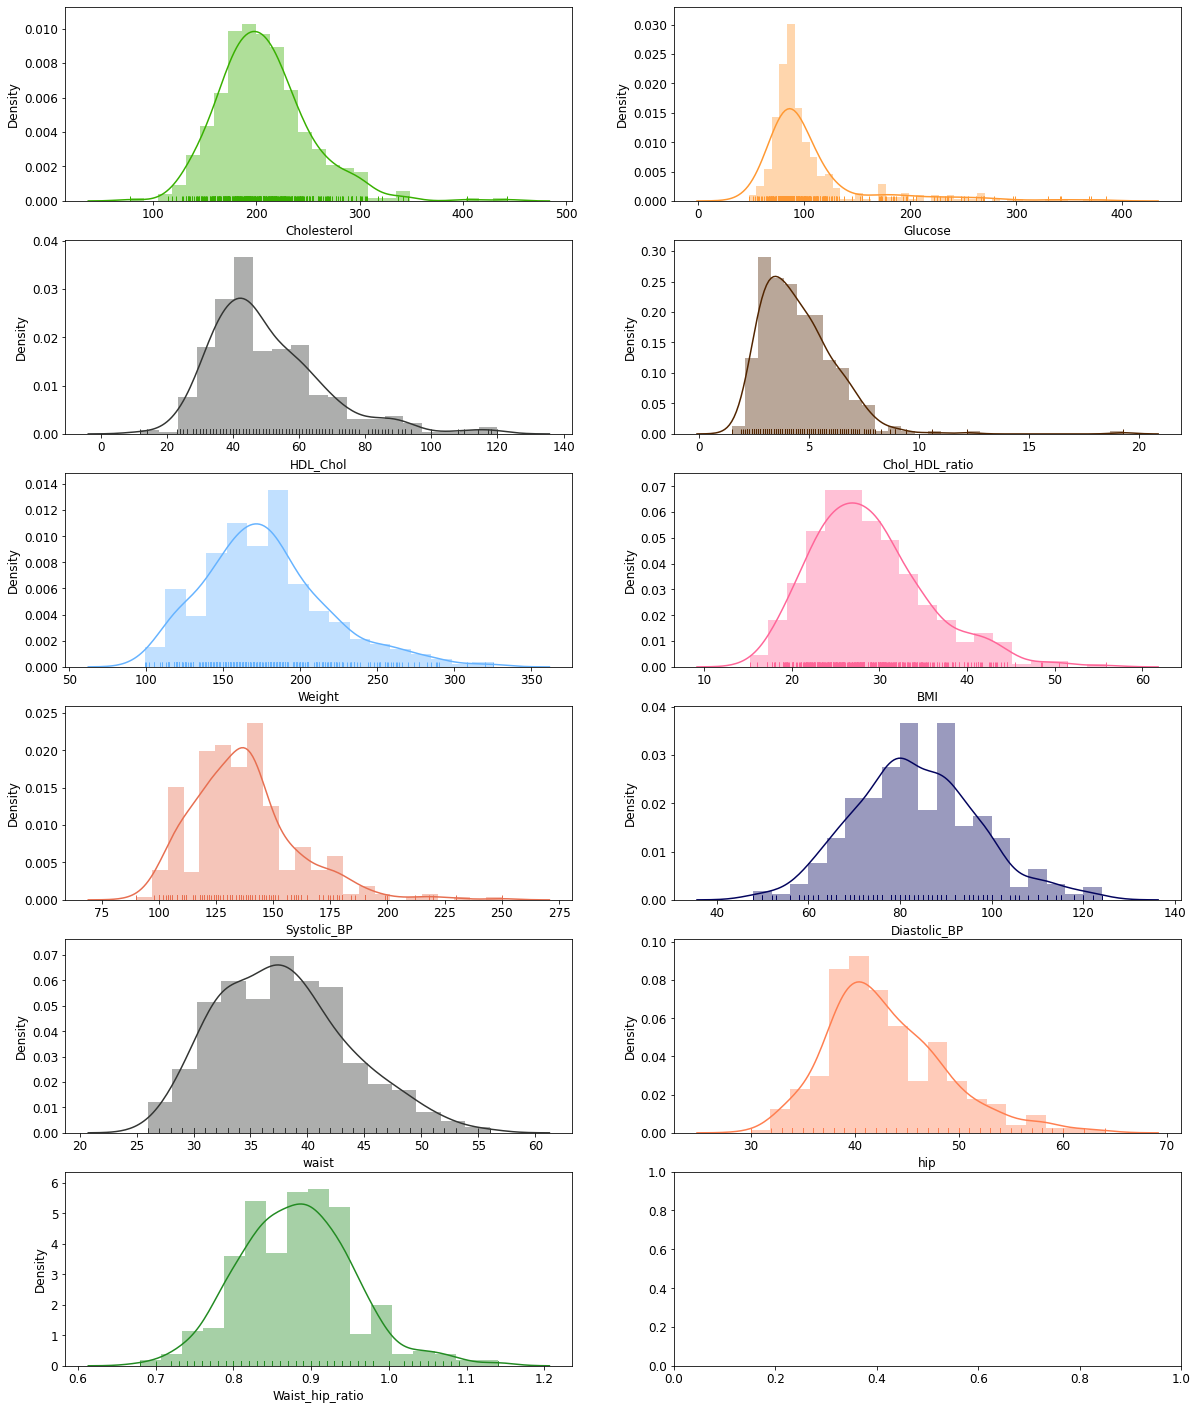

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(6, 2, figsize=(20,25))
axs = axs.flatten()
sns.distplot(df['Cholesterol'],rug = True,color='#38b000',ax=axs[0])
sns.distplot(df['Glucose'],rug = True,color='#FF9933',ax=axs[1])
sns.distplot(df['HDL_Chol'],rug = True,color='#333533',ax=axs[2])
sns.distplot(df['Chol_HDL_ratio'],rug = True,color='#522500',ax=axs[3])
sns.distplot(df['Weight'],rug = True,color='#66b3ff',ax=axs[4])
sns.distplot(df['BMI'],rug = True,color='#FF6699',ax=axs[5])
sns.distplot(df['Systolic_BP'],rug = True,color='#e76f51',ax=axs[6])
sns.distplot(df['Diastolic_BP'],rug = True,color='#03045e',ax=axs[7])
sns.distplot(df['waist'],rug = True,color='#333533',ax=axs[8])
sns.distplot(df['hip'],rug = True,color='coral',ax=axs[9])
sns.distplot(df['Waist_hip_ratio'],rug = True,color='forestgreen',ax=axs[10])

plt.show()


Attributes such as Cholesterol, BMI, Diastolic_BP, Weight, Systolic_BP, Hip, waist, waist_hip_ratio... actually mostly all of the attributes above have a bell like curve, gaussian. So we can standardize the data before we do a regression on it, but it is not necessary. I will test both cases, before standardization and after.

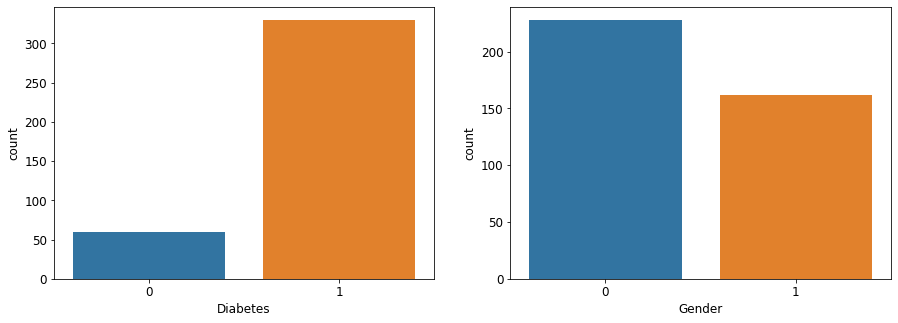

In [ ]:
count_columns = ['Diabetes', 'Gender']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for variable, subplot in zip(count_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
#gender 0==female 1== male
#diabetes 0==diabetes 1== no diabetes

###Outliers###

<function matplotlib.pyplot.show>

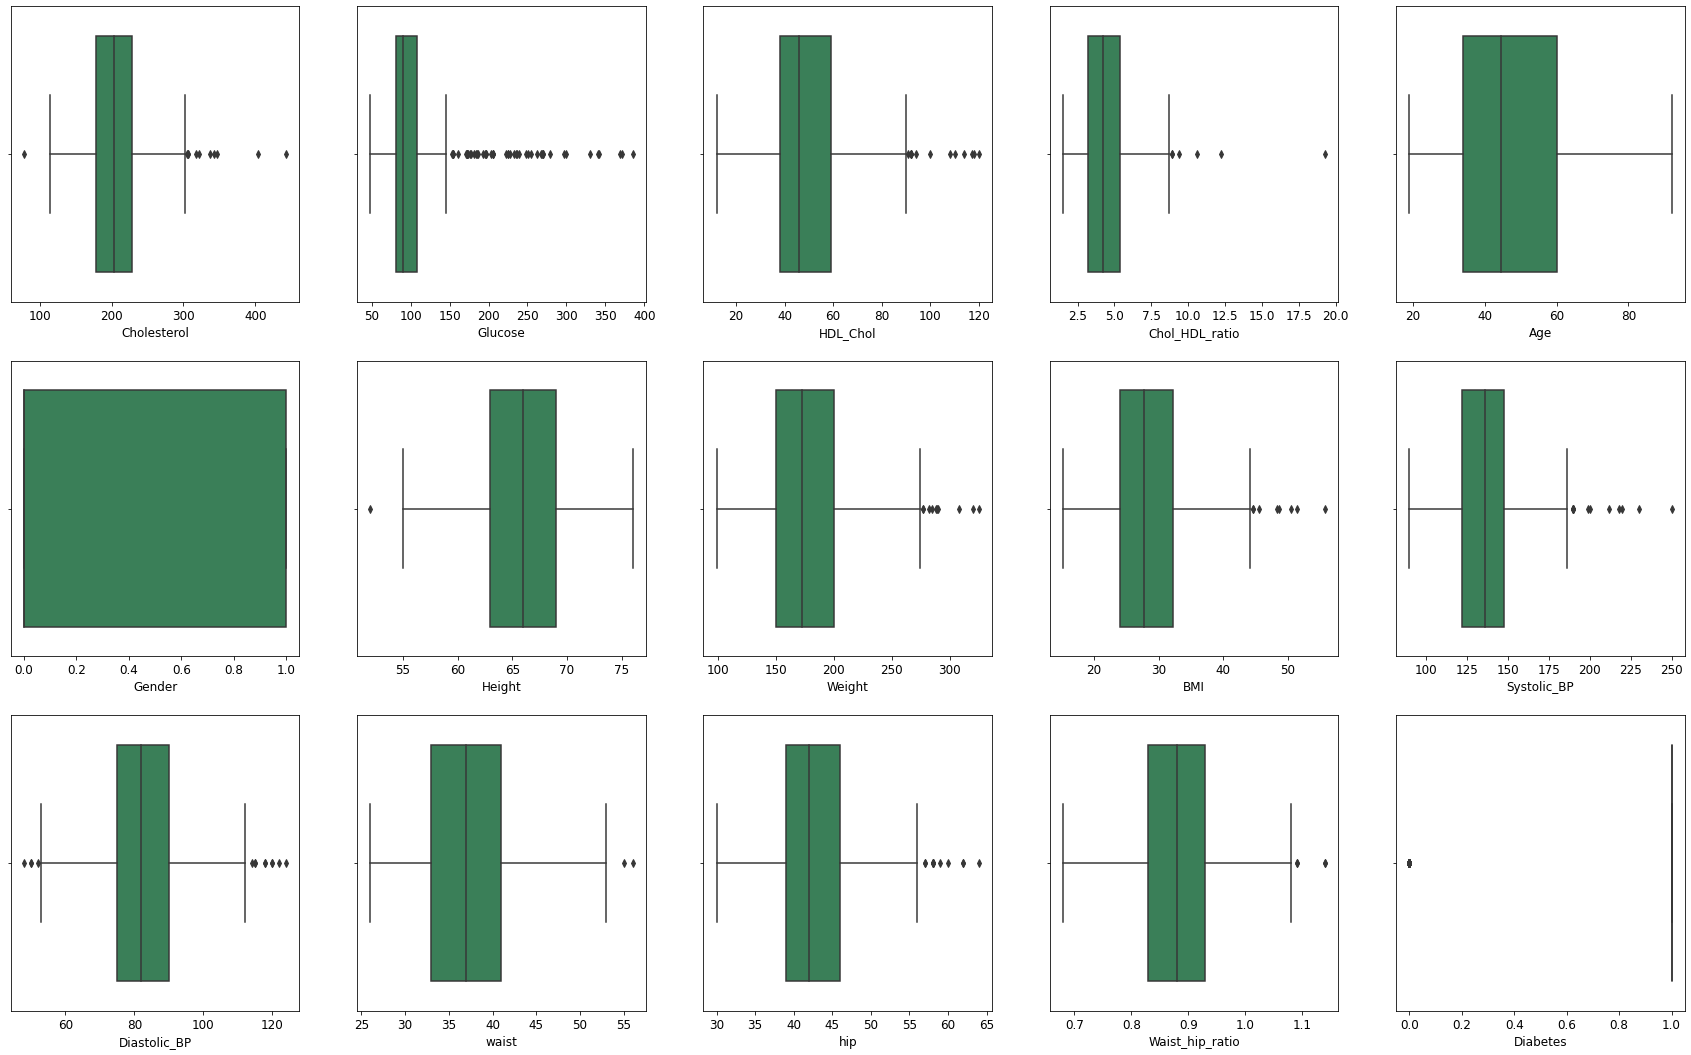

In [ ]:
#box plots to check any outliers
plt.figure(figsize=(30,25))

import warnings
warnings.filterwarnings("ignore")

j=1 
columns = df.columns.tolist() #makes lists of the cols 
for k in num_features[0:]:
  plt.subplot(4,5,j)
  sns.boxplot(x=k, data = df, color= 'seagreen')
  j=j+1 #the way to map the plots in the output

plt.show

There seem to be quite a few outliers here in Cholestoral, Glucose, HDL_Chol, Systolic_BP, Diastolic_BP,  Weight, BMI. 

Diabetes looks like that because there are very few 0's compared to 1's. REMEMBER IN THIS DATASET the 0 means that you have diabetes and 1 means you don't.  


###Quick Test###
This test here checks if a feature matters to the response variable

In [ ]:
def theTest(val, condition):
  fft = pd.DataFrame(df[val])
  fft['Diabetes'] = df['Diabetes']
  records = fft[fft[val] >= condition]
  counter1 = 0
  counter2 = 0
  for index, row in records.iterrows():
    counter1 = counter1 + 1
    if (row['Diabetes'] == 1):
      counter2 = counter2 + 1
  print(counter2/counter1)

letsSeeIfItMatters = ['Cholesterol','Glucose', 'HDL_Chol', 'Chol_HDL_ratio', 'Age','Gender', 'Height','Weight','BMI','Systolic_BP','Diastolic_BP','waist','hip' , 'Waist_hip_ratio']
for k in letsSeeIfItMatters:
  print(f'{k}: ') 
  theTest(k, 1)


Cholesterol: 
0.8461538461538461
Glucose: 
0.8461538461538461
HDL_Chol: 
0.8461538461538461
Chol_HDL_ratio: 
0.8461538461538461
Age: 
0.8461538461538461
Gender: 
0.8395061728395061
Height: 
0.8461538461538461
Weight: 
0.8461538461538461
BMI: 
0.8461538461538461
Systolic_BP: 
0.8461538461538461
Diastolic_BP: 
0.8461538461538461
waist: 
0.8461538461538461
hip: 
0.8461538461538461
Waist_hip_ratio: 
0.7727272727272727


As shown above in the correlation matrix, a lot of these attributes come in major play for Diabetes. Pretty much all of them matter and waist_hip_ratio a little less than others. 

###Making a subset of necessary Data###

In [ ]:
sub_df = df[['Cholesterol', 'Glucose', 'Diabetes']]
sub_df

,Cholesterol,Glucose,Diabetes
1,193,77,1
2,146,79,1
3,217,75,1
4,226,97,1
5,164,91,1
...,...,...,...
386,227,105,1
387,226,279,0
388,301,90,1
389,232,184,0


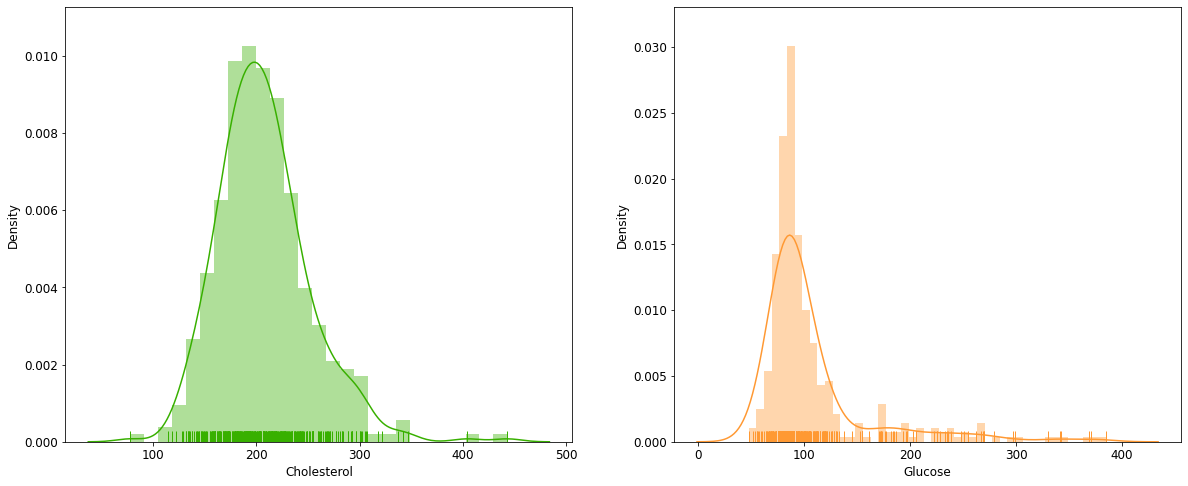

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,8))
axs = axs.flatten()
sns.distplot(sub_df['Cholesterol'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(sub_df['Glucose'],rug=True,color='#FF9933',ax=axs[1])


###Crosstabs###

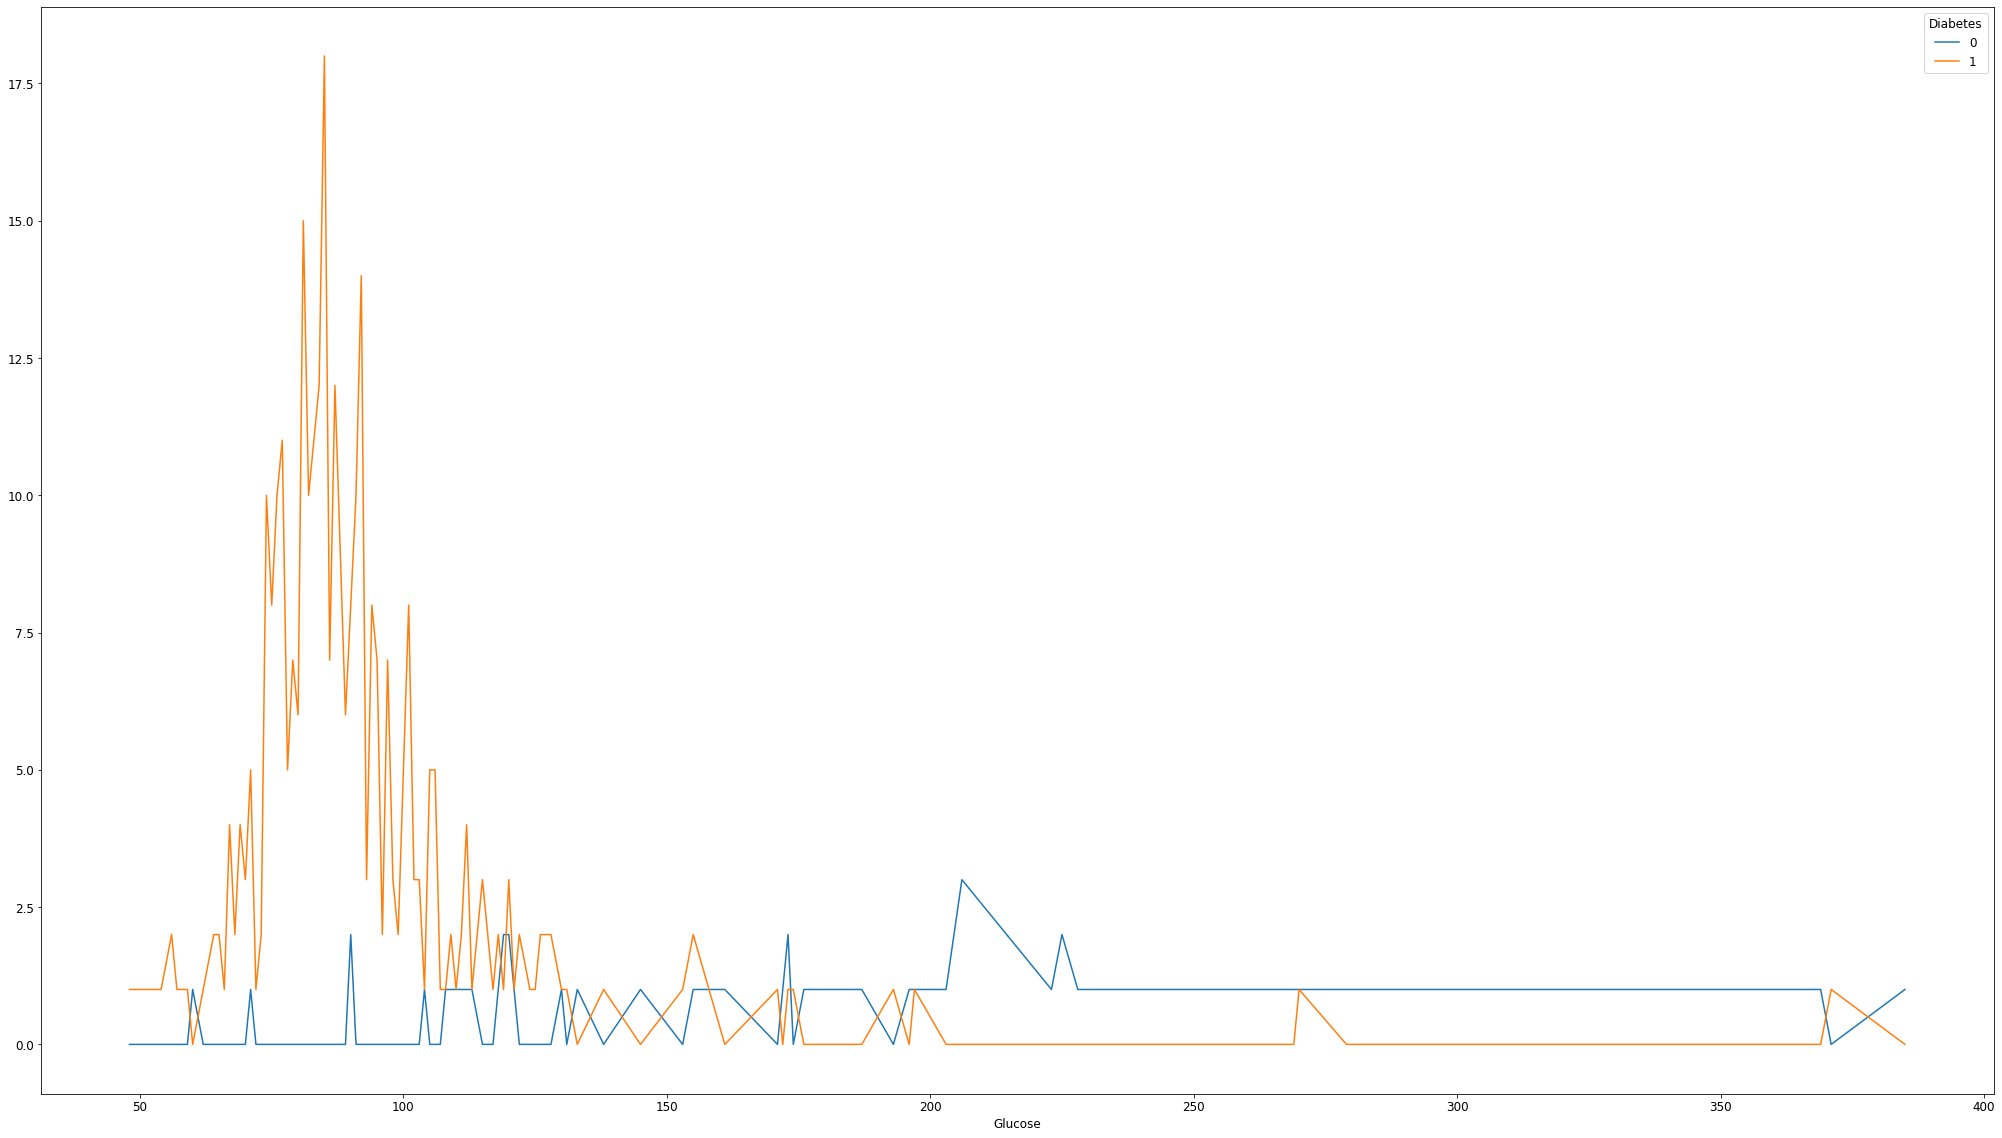

In [ ]:
gct = pd.crosstab(sub_df.Glucose,sub_df.Diabetes)
scatterplot = gct.plot.line(rot=0, figsize= (35,20))

In [ ]:
pd.crosstab(sub_df.Glucose,sub_df.Diabetes).describe()

Diabetes,0,1
count,116.000000,116.000000
mean,0.517241,2.844828
std,0.625304,3.802982
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,4.000000
max,3.000000,18.000000


In [ ]:
pd.crosstab(sub_df.Cholesterol,sub_df.Diabetes).describe()

Diabetes,0,1
count,153.000000,153.000000
mean,0.392157,2.156863
std,0.661292,1.556471
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,3.000000,10.000000


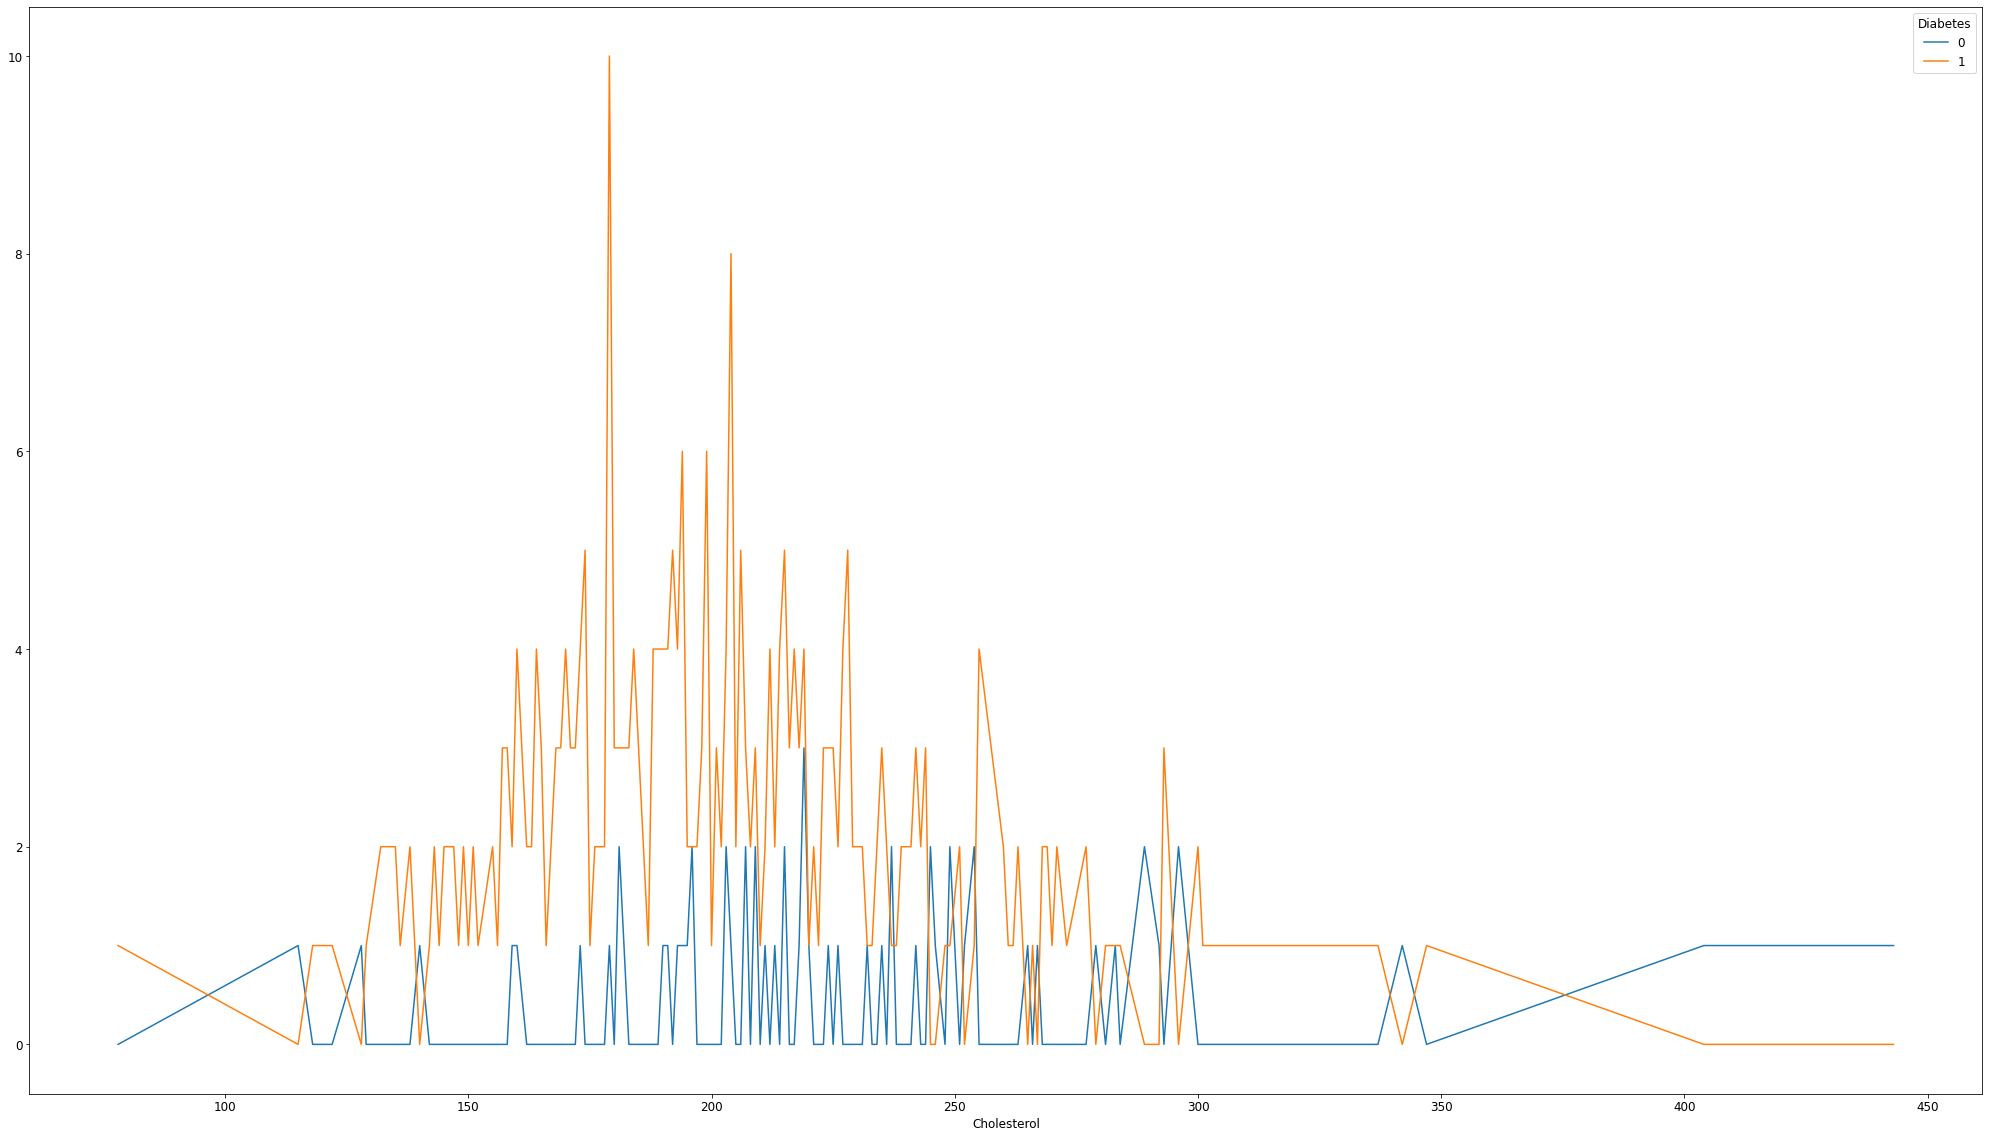

In [ ]:
cct = pd.crosstab(sub_df.Cholesterol,sub_df.Diabetes)
scatterplot = cct.plot.line(rot=0, figsize= (35,20))

#VIF#
##Testing Multicollinearity##

In [ ]:
diabetes_floats = df
diabetes_floats.head()

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio,Diabetes
1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,1
2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,1
3,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,1
4,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,1
5,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,1


In [ ]:
diabetes_floats = diabetes_floats.apply(pd.to_numeric)
diabetes_floats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL_Chol         390 non-null    int64  
 3   Chol_HDL_ratio   390 non-null    float64
 4   Age              390 non-null    int64  
 5   Gender           390 non-null    int64  
 6   Height           390 non-null    int64  
 7   Weight           390 non-null    int64  
 8   BMI              390 non-null    float64
 9   Systolic_BP      390 non-null    int64  
 10  Diastolic_BP     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  Waist_hip_ratio  390 non-null    float64
 14  Diabetes         390 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 45.8 KB


In [ ]:
diabetes_floats.head()

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio,Diabetes
1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,1
2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,1
3,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,1
4,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,1
5,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,1


In [ ]:
#scale the data

from sklearn.preprocessing import StandardScaler
diabetes_floats[diabetes_floats.columns] = StandardScaler().fit_transform(diabetes_floats[diabetes_floats.columns])
diabetes_floats.head()

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,waist,hip,Waist_hip_ratio,Diabetes
1,-0.319013,-0.564655,-0.073401,-0.360132,-1.692029,-0.842927,-1.265070,-1.447312,-0.951944,-0.838071,-0.985822,-1.020105,-0.882489,-0.565995,0.426401
2,-1.372619,-0.527432,-0.536983,-0.533102,-1.692029,-0.842927,-1.520574,-1.050840,-0.360358,-1.276087,-1.875972,-0.846299,-0.528950,-0.702760,0.426401
3,0.218998,-0.601879,0.216339,-0.302476,-1.631108,-0.842927,0.267951,0.237692,0.079539,-1.188484,-0.837464,0.370339,0.354899,0.117828,0.426401
4,0.420753,-0.192418,1.143504,-0.763729,-1.631108,-0.842927,-0.498560,-1.571209,-1.391841,-0.662865,-1.430897,-1.193910,-0.705719,-1.249818,0.426401
5,-0.969111,-0.304089,0.969660,-1.224982,-1.631108,-0.842927,1.034462,-0.902163,-1.300828,-0.662865,0.201045,-1.020105,-0.705719,-0.839524,0.426401


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#it seems, that the fellow who made VIF, felt there should be a 
#constant column in front, as such, we need to put one in (of all 1s)
X = add_constant(diabetes_floats)

#now that we are set up, we can use VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,1.00,const
1,3.87,Cholesterol
2,2.03,Glucose
3,5.61,HDL_Chol
4,7.01,Chol_HDL_ratio
5,1.75,Age
6,2.47,Gender
7,21.96,Height
8,76.88,Weight
9,77.59,BMI


In [ ]:
#now drop the three highest VIFs
diabetes_floats = diabetes_floats.drop(['Height','Weight','BMI','waist','hip','Waist_hip_ratio'],axis =1)
diabetes_floats.head()


,Cholesterol,Glucose,HDL_Chol,Chol_HDL_ratio,Age,Gender,Systolic_BP,Diastolic_BP,Diabetes
1,-0.319013,-0.564655,-0.073401,-0.360132,-1.692029,-0.842927,-0.838071,-0.985822,0.426401
2,-1.372619,-0.527432,-0.536983,-0.533102,-1.692029,-0.842927,-1.276087,-1.875972,0.426401
3,0.218998,-0.601879,0.216339,-0.302476,-1.631108,-0.842927,-1.188484,-0.837464,0.426401
4,0.420753,-0.192418,1.143504,-0.763729,-1.631108,-0.842927,-0.662865,-1.430897,0.426401
5,-0.969111,-0.304089,0.969660,-1.224982,-1.631108,-0.842927,-0.662865,0.201045,0.426401


In [ ]:
#now go and check out the regression
#if we want to compare, we could have done it beforer VIF as well
#we will regress to find the MPG
#!!!Everytime I run this, it changed values. run it a few times and screenshot it, show that it changes values everytime and that we aere confused. 
y = diabetes_floats['Diabetes']
X = diabetes_floats.drop('Diabetes',axis =1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
le = LinearRegression(normalize=True).fit(x_train,y_train)
y_pred = le.predict(x_test)
print("Training score: ", le.score(x_train, y_train))
print("Testing_score : ", r2_score(y_test, y_pred))

Training score:  0.5095186861127421
Testing_score :  0.4329846927435794


Based on the VIF the multicolliniarity in this dataset isn't high with the columns I am using. Though everytime I run this last code block, my testing and traininig score changes. I wonder why. 

3.87	Cholesterol 

2.03	Glucose

With these values in VIF factor it shows that these two attribute are moderately correlated. 

#Chi Square#

In [ ]:
X = df.drop('Diabetes',1)
y = df['Diabetes']
test = SelectKBest(score_func = chi2, k=4)
fit = test.fit(X,y)
feature_score = pd.DataFrame()
#perform chi-square test
for i in range(X.shape[1]):
  chi = pd.DataFrame({'Features' : X.columns[i],'Score':fit.scores_[i]},index=[i])
  feature_score = pd.concat([feature_score, chi])
feature_score

,Features,Score
0,Cholesterol,156.251954
1,Glucose,4980.445572
2,HDL_Chol,35.031740
3,Chol_HDL_ratio,19.322669
4,Age,204.893363
5,Gender,0.054994
6,Height,0.049878
7,Weight,95.107751
8,BMI,12.431008
9,Systolic_BP,58.465241


In [ ]:
X = sub_df.drop('Diabetes',1)
y = sub_df['Diabetes']
test = SelectKBest(score_func = chi2, k=2)
fit = test.fit(X,y)
feature_score = pd.DataFrame()
#perform chi-square test
for i in range(X.shape[1]):
  chi = pd.DataFrame({'Features' : X.columns[i],'Score':fit.scores_[i]},index=[i])
  feature_score = pd.concat([feature_score, chi])
feature_score

,Features,Score
0,Cholesterol,156.251954
1,Glucose,4980.445572


The chi square, doing it for the two different sets didn't do anything, Honestly the chi square isn't telling me much from what I see. 

We can see thought that after filtering it down to the two cols we are questioning that Cholestrol seems to effect the response variabl more. 


#Model 1
##Original Data##

In [ ]:
y, X = dmatrices('Diabetes ~ Cholesterol + Glucose + HDL_Chol + Chol_HDL_ratio + Age + Gender + Height + Weight + BMI + Systolic_BP + Diastolic_BP + waist + hip +  Waist_hip_ratio', 
                 df, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.9230769230769231

In [ ]:
y.mean()

0.8461538461538461

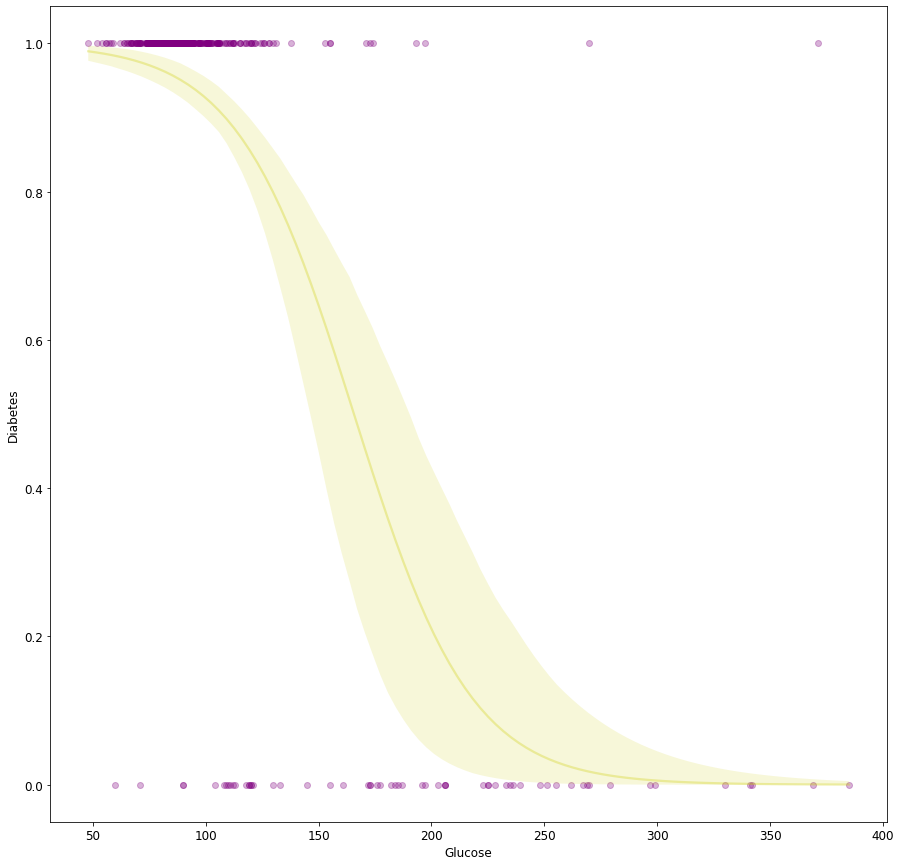

In [ ]:
sns.regplot(x=df["Glucose"], y=df["Diabetes"], data=df, logistic=True, 
            scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': '#CCCC00', 'alpha': 0.3})

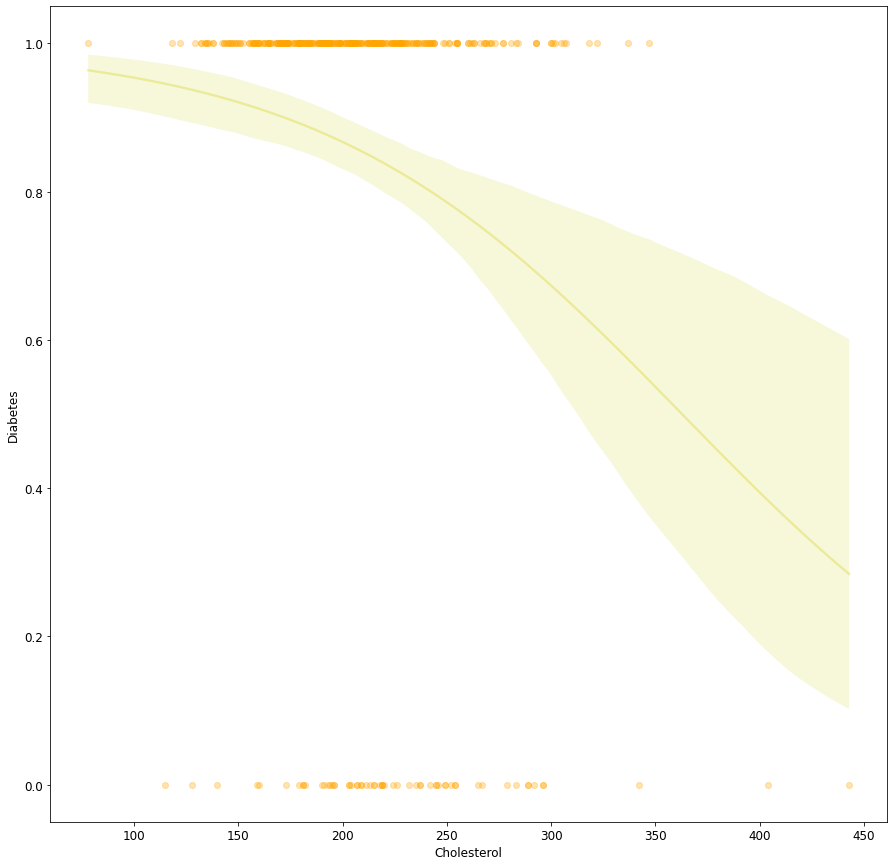

In [ ]:
sns.regplot(x=df["Cholesterol"], y=df["Diabetes"], data=df, logistic=True,
            scatter_kws = {'color': 'orange', 'alpha': 0.3}, line_kws = {'color': '#CCCC00', 'alpha': 0.3})

##Subset Data##

In [ ]:
#SUBDF
y2, X2 = dmatrices('Diabetes ~ Cholesterol + Glucose', 
                 sub_df, return_type="dataframe")
y2 = np.ravel(y2)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model2 = LogisticRegression()
model2 = model.fit(X2, y2)

# check the accuracy on the training set
model2.score(X2, y2)

0.9282051282051282

In [ ]:
y2.mean()

0.8461538461538461

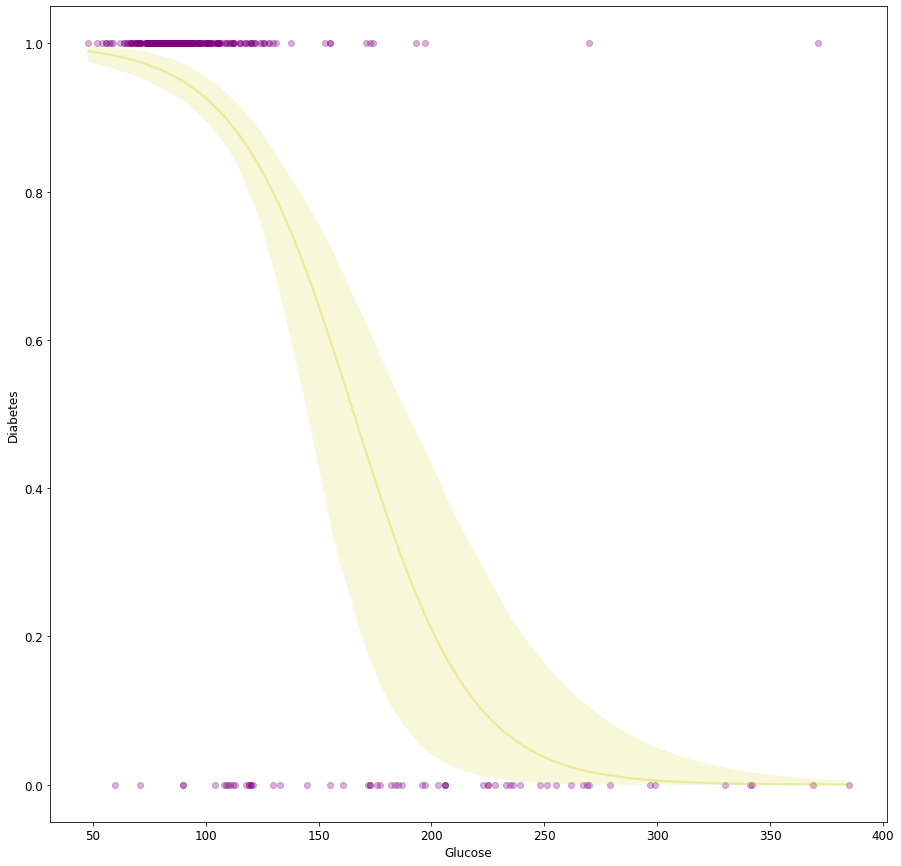

In [ ]:
sns.regplot(x=sub_df["Glucose"], y=sub_df["Diabetes"], data=sub_df, logistic=True, 
            scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': '#CCCC00', 'alpha': 0.3})


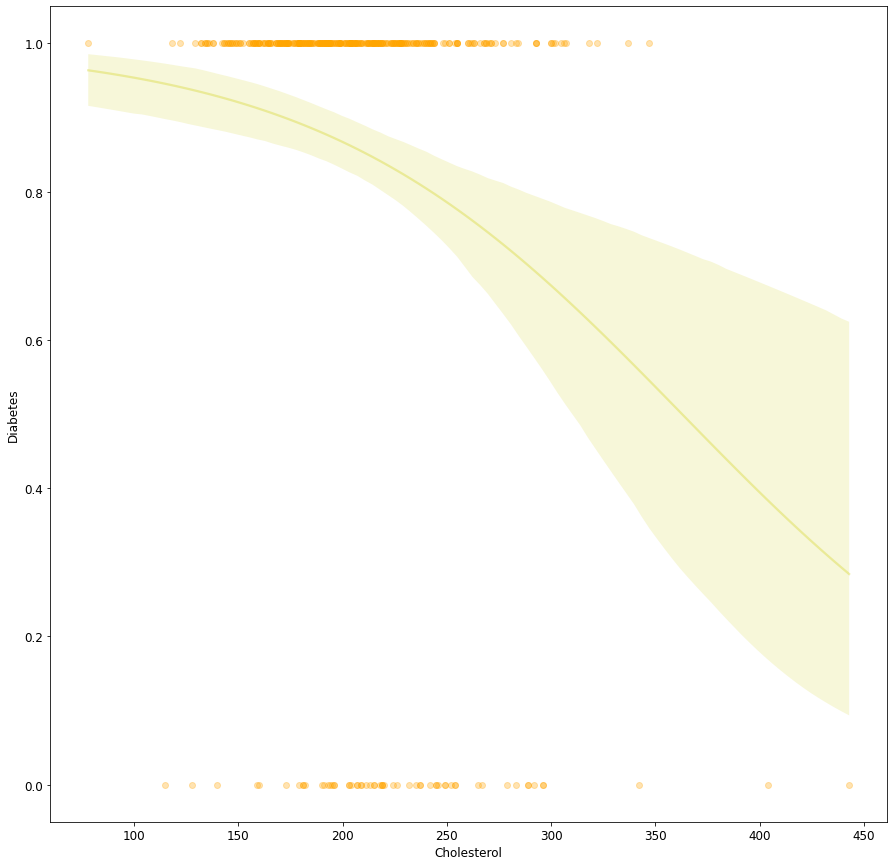

In [ ]:
sns.regplot(x=sub_df["Cholesterol"], y=sub_df["Diabetes"], data=sub_df, logistic=True,
            scatter_kws = {'color': 'orange', 'alpha': 0.3}, line_kws = {'color': '#CCCC00', 'alpha': 0.3})

The training set data is pretty accurate. 
The graphs for both don't differ that much either. 

###Standardization###
I tried to standardize the subset ddf to see if it changed anytihng. 

Then we standardize the sub_df


In [ ]:
sub_df_stded = sub_df
scale= StandardScaler()

scaled_data = scale.fit_transform(sub_df_stded) 
print(scaled_data)

[[-0.31901328 -0.5646553   0.42640143]
 [-1.37261932 -0.52743157  0.42640143]
 [ 0.21899831 -0.60187902  0.42640143]
 ...
 [ 2.10203888 -0.32270108  0.42640143]
 [ 0.55525555  1.42681407 -2.34520788]
 [-0.94669348 -0.24825362  0.42640143]]


Check the Logit after atandardization, see if it increased the accuracy or not.

In [ ]:
y3, X3 = dmatrices('Diabetes ~ Cholesterol + Glucose', 
                 sub_df_stded, return_type="dataframe")
y3 = np.ravel(y3)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model3 = LogisticRegression()
model3 = model3.fit(X3, y3)

# check the accuracy on the training set
model3.score(X3, y3)

0.9282051282051282

In [ ]:
y3.mean()

0.8461538461538461

It seems as if standardizing the data didn't really do much. The score and the mean are exactly the same to what they were before. 

So the accuracy of the original model at the end of Logit is: 0.9230769230769231

Sub_DF: 0.9282051282051282

sub_df_stded: 0.9282051282051282

It doesn't change much but it does increase a bit for the sub_df, and the accuracy for the sub_df is just a little better.

#BACKWARDS ELIMINATION#

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("Diabetes",1)   #Feature Matrix
y = df["Diabetes"]            #Target Variable

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
be_df = cols
be_df = df[be_df]
be_df

,Cholesterol,Glucose,Age
1,193,77,19
2,146,79,19
3,217,75,20
4,226,97,20
5,164,91,20
...,...,...,...
386,227,105,83
387,226,279,84
388,301,90,89
389,232,184,91


###Prediction###


In [ ]:
real_outcome = sub_df['Diabetes']
pred_outcome = []

Chol = sub_df['Cholesterol'].to_numpy()
Glucose = sub_df['Glucose'].to_numpy()


#Now we put stuff into the predicted outcome []
#all of these are for they have diabetes.
for x in Glucose:
    if x > 126.0 and Chol[x] >= 100.0:
          pred_outcome.append(1)
    else:
          pred_outcome.append(0)

print(pred_outcome)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
y_predict = pred_outcome
y_test = real_outcome

pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predict 0','Predict 1'],index= ['True 0','True 1'] )

,Predict 0,Predict 1
True 0,18,42
True 1,315,15


Here we see that our true positive prediction is 15, true negative is 18. False negative is 315 and false positive are 42.

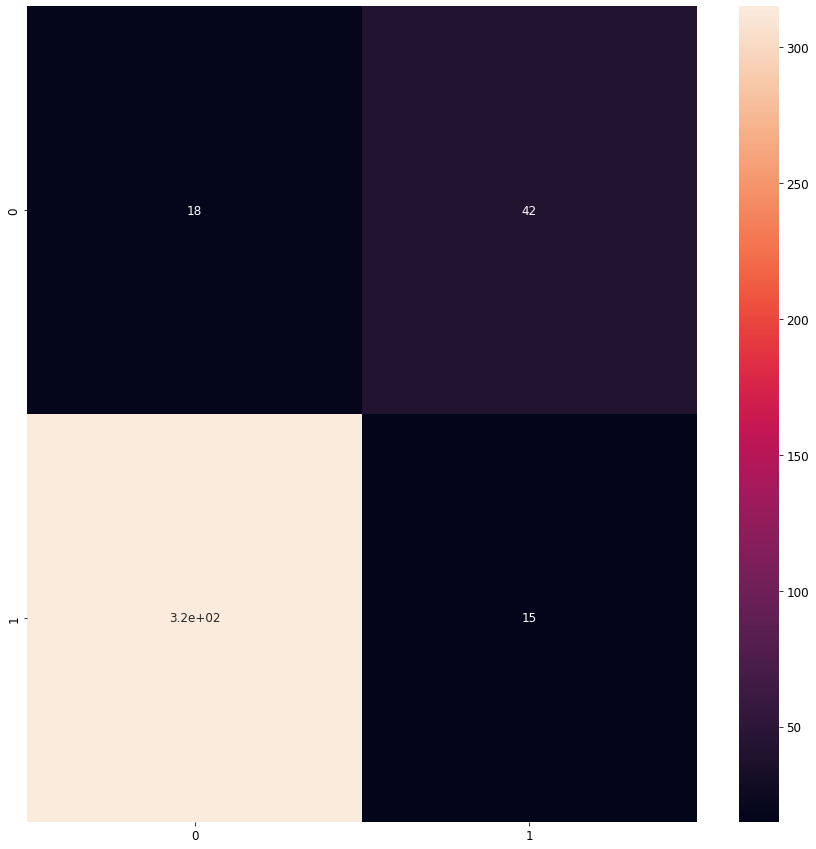

In [ ]:
#heatmap with confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [ ]:
# my code
conf_mat = confusion_matrix(y_test, y_predict)
tp = conf_mat[1][1]
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp, tn, fp, fn

(15, 18, 42, 315)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy* 100: .2f} %')

Accuracy:  8.46 %


The accuracy if this predicted outcome really isn't high at all. It's too low to be honest. 

In [ ]:
sub_df1 = sub_df
sub_df1['Prediction'] = pred_outcome
sub_df1 

,Cholesterol,Glucose,Diabetes,Prediction
1,193,77,1,0
2,146,79,1,0
3,217,75,1,0
4,226,97,1,0
5,164,91,1,0
...,...,...,...,...
386,227,105,1,0
387,226,279,0,1
388,301,90,1,0
389,232,184,0,1


#Model 2#
##SMOTE##


First on the normal df:

In [ ]:
data_final = df
X = data_final.loc[:, data_final.columns != 'Diabetes']
y = data_final.loc[:, data_final.columns == 'Diabetes']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
neighbors = np.arange(1, 9)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  470
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [ ]:
model_Smote = LogisticRegression()
model_Smote = model_Smote.fit(X_train, y_train)
# check the accuracy on the training set
model_Smote.score(X_train, y_train)

0.9304029304029304

The score here is 93, which is higher than logit. 

In [ ]:
data_final_vars= df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True False  True  True False False  True False  True
  True False]
[7 1 6 1 5 1 1 3 2 1 4 1 1 8]


In [ ]:
X=X_train
y=y_train
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.191306
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                  273
Model:                          Logit   Df Residuals:                      259
Method:                           MLE   Df Model:                           13
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.5259
Time:                        03:17:23   Log-Likelihood:                -52.226
converged:                       True   LL-Null:                       -110.15
Covariance Type:            nonrobust   LLR p-value:                 1.322e-18
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Cholesterol         0.0012      0.012      0.105      0.916      -0.022       0.024
Glucose       

In [ ]:
#SUBDF
data_final = sub_df
X2 = data_final.loc[:, data_final.columns != 'Diabetes']
y2 = data_final.loc[:, data_final.columns == 'Diabetes']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
neighbors = np.arange(1, 3)
columns = X2_train.columns
os_data_X2,os_data_y2=os.fit_resample(X2_train, y2_train)
os_data_X2 = pd.DataFrame(data=os_data_X2,columns=columns )
os_data_y2= pd.DataFrame(data=os_data_y2,columns=['y2'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X2))

length of oversampled data is  470


In [ ]:
model2_Smote = LogisticRegression()
model2_Smote = model_Smote.fit(X2_train, y2_train)
# check the accuracy on the training set
model2_Smote.score(X2_train, y2_train)
#increased by 1%

0.9413919413919414

The score of the sub_df is even better. 

In [ ]:
data_final_vars= sub_df.columns.values.tolist()
y=['y2']
X=[i for i in data_final_vars if i not in y2]
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X2_train,y2_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True]
[3 2 1]


In [ ]:
X=X2_train
y=y2_train
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.258316
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.360     
Dependent Variable: Diabetes         AIC:              147.0406  
Date:               2022-06-30 03:17 BIC:              157.8690  
No. Observations:   273              Log-Likelihood:   -70.520   
Df Model:           2                LL-Null:          -110.15   
Df Residuals:       270              LLR p-value:      6.1220e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Cholesterol    0.0172    0.0029   5.9039  0.0000   0.0115   0.0229
Glucose       -0.0067    0.0053  -1.2679  0.2048  -0.0171   0.

As shown while doing the backwards selection, the columns with the p-value lower then 0.5 are Glucose, and Cholesterol, (not including age, it's not in our subset). Meaning little correlation ot our reponse variable.

At the end of this model we see that with Smote the accuracy of our data set actually does increase for both the original df and the sub_df.

Original DF: 0.9304029304029304

sub_DF: 0.9413919413919414

The accuracy for the sub_df as usual is better than the original df. 

#Model 3#
##KNN Model##
###Original Data###

In [ ]:
#https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
#chose 13 neighbors because of 15 columsn
knn = KNeighborsClassifier(n_neighbors=13)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.8717948717948718


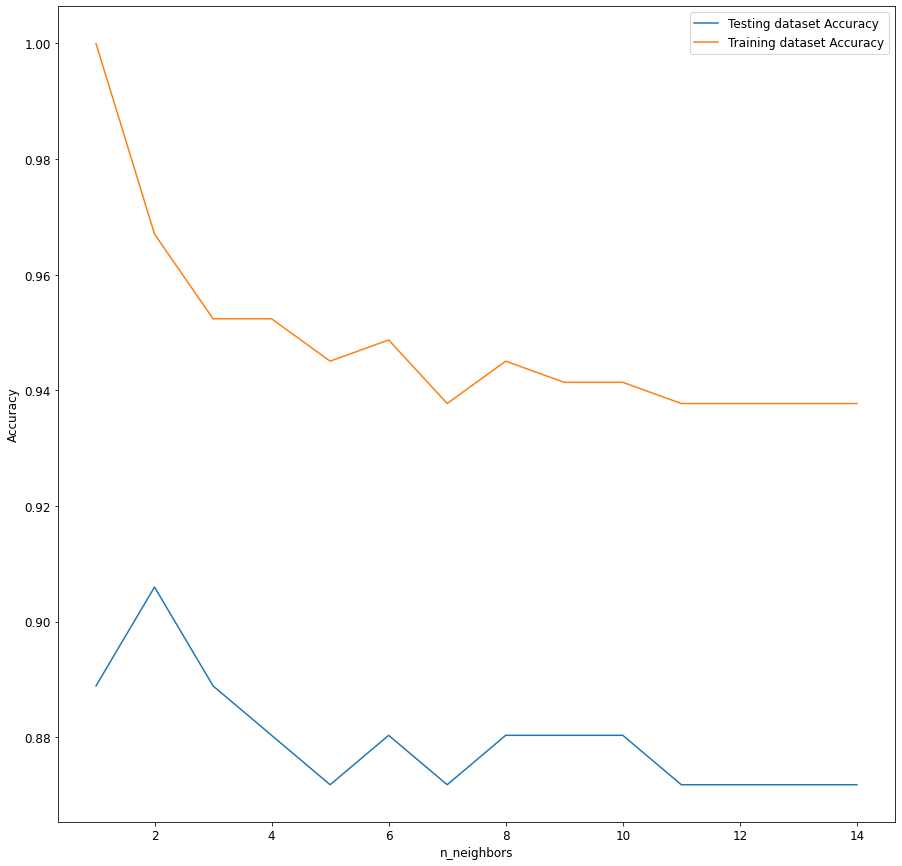

In [ ]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

The accuracy using K-neighbors decreases alot. The training data set has higher accuracy than the testing dat set. 

###Sub_DF###

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
 
knn.fit(X2_train, y2_train)
 
# Calculate the accuracy of the model
print(knn.score(X2_test, y2_test))

0.8888888888888888


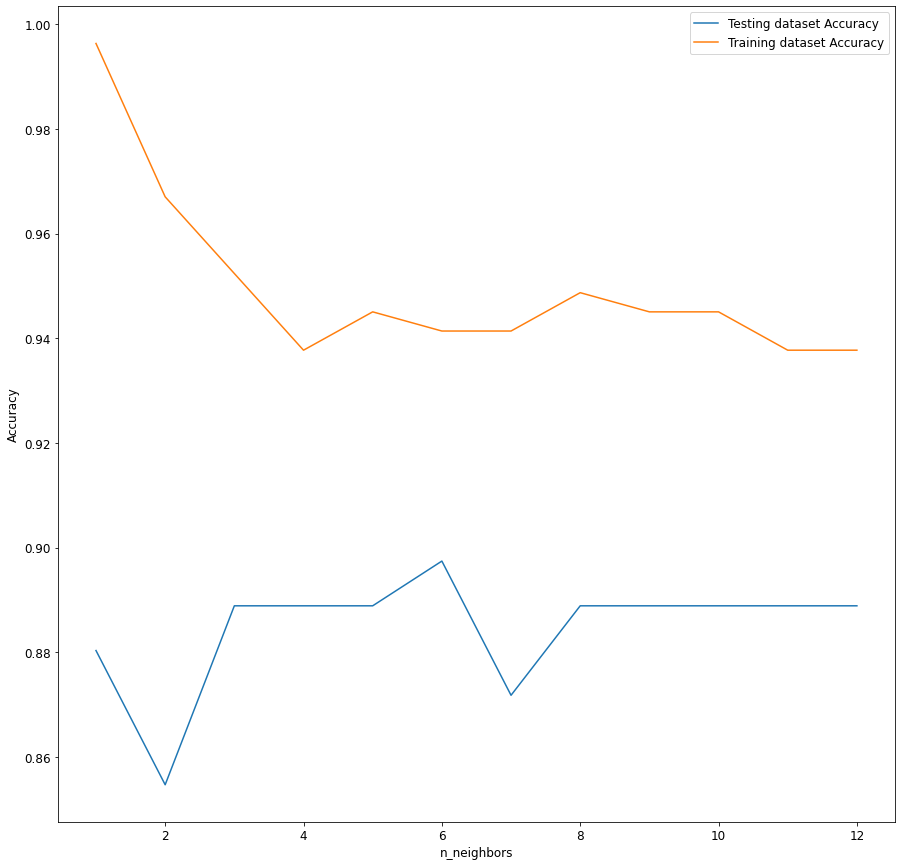

In [ ]:
neighbors2 = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors2))
test_accuracy = np.empty(len(neighbors2))
 
# Loop over K values
for i, k in enumerate(neighbors2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X2_train, y2_train)
    test_accuracy[i] = knn.score(X2_test, y2_test)
 
# Generate plot
plt.plot(neighbors2, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors2, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Same thing with the sub_df, and as usual the accuracy for sub_df is higher. 

#Trees

Original

Checking the accuracy with trees as well.

In [ ]:
#https://www.datacamp.com/tutorial/decision-tree-classification-python
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8632478632478633


Sub_df

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf.fit(X2_train,y2_train)

#Predict the response for test dataset
y2_pred = clf2.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.8888888888888888


It seems that the accuracy for the trees is the lowest. 
Yet still the sub_df has higher accuracy.


#ROC & AUC

###DF:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.959


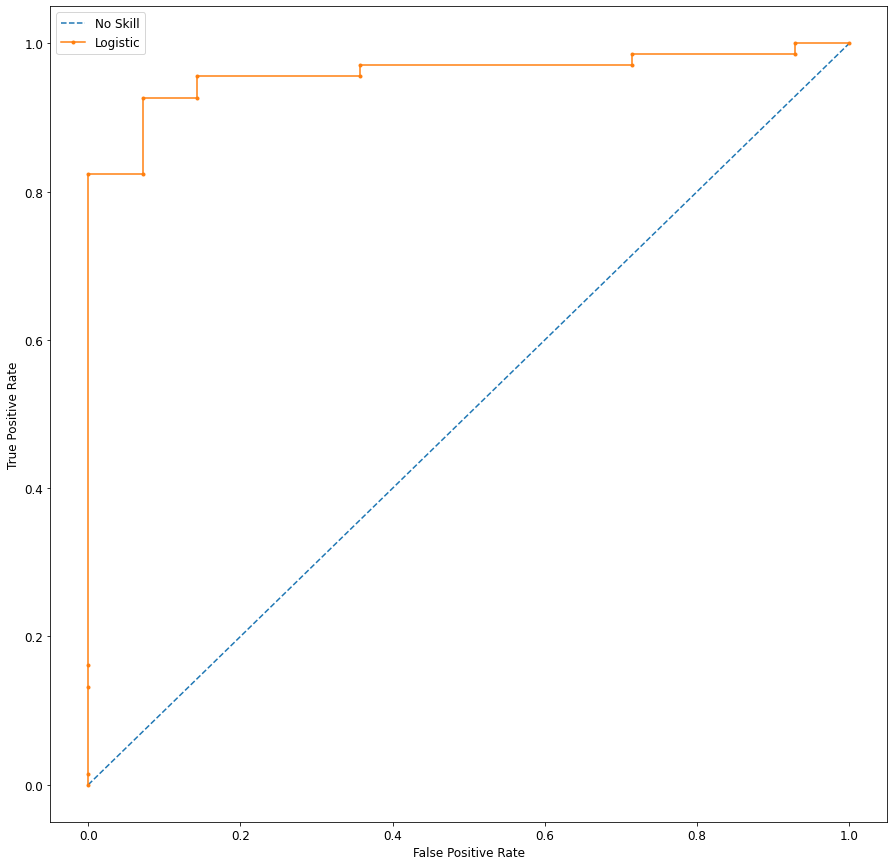

In [ ]:
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

###Sub-DF

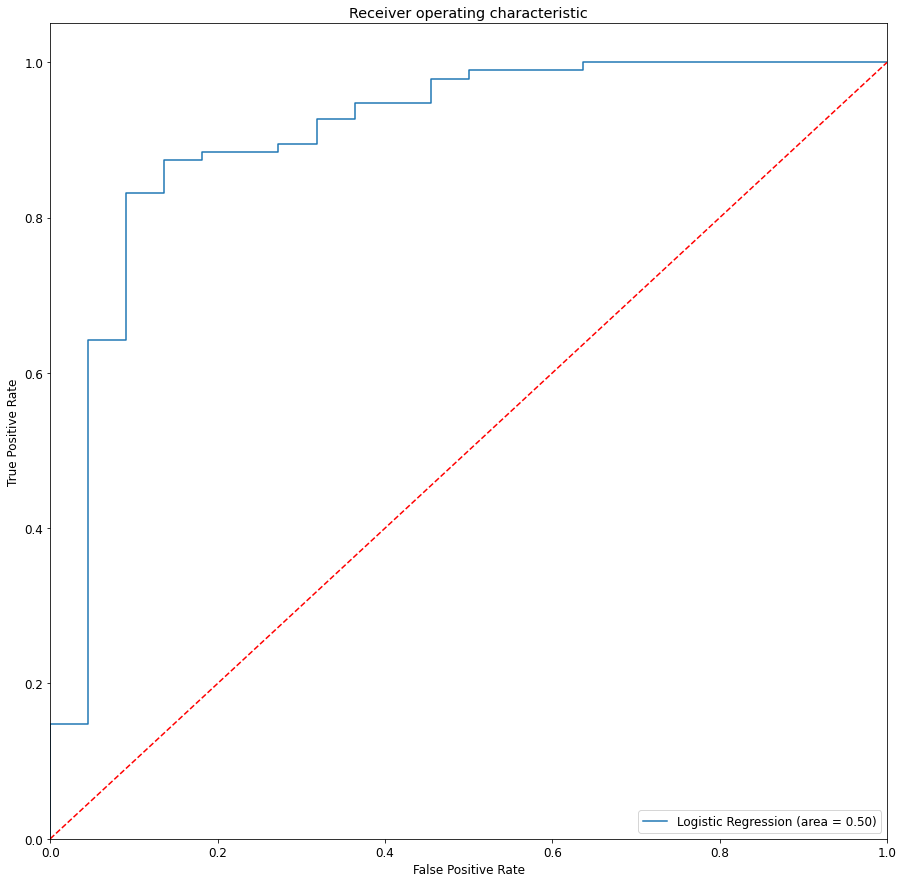

In [ ]:
logit_roc_auc2 = roc_auc_score(y2_test, model2.predict(X2_test))
fpr2, tpr2, thresholds2 = roc_curve(y2_test, model2.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

It seems that they're both look similar but the sub df looks a little worse. 

#Conclusions#

Throughout our whole analysis we have noticed that compared to the other attributes, glucose and cholesterol do have a moderate effect on whether you have diabetes. In our VIF we can see that there is moderate correlation to the response variable, and when we did our backwards selection, we see that Glucose, Age, and Cholesterol have the desired p-values. Which also means that the attributes that we chose, have little to no correlation to our response variable. Even in the Chi square, the attributes Glucose and Cholesterol have a very high feature score, which means that they aren't affecting the reponse as much either. 

In the end our question was proven wrong. BUT the data set accuracies are really high with our sub_df. That is weird. After standardizing the data in the logit models, we saw that there was no change, so didn't do it agian. 